## Tensors

In [1]:
import torch

a = torch.FloatTensor(list(range(24)))
print(a)
a = a.reshape([3,2,-1])
print(a)
b = a[:,:,0]
print(b)
b[0,0]=-10
print(a)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])
tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.]],

        [[ 8.,  9., 10., 11.],
         [12., 13., 14., 15.]],

        [[16., 17., 18., 19.],
         [20., 21., 22., 23.]]])
tensor([[ 0.,  4.],
        [ 8., 12.],
        [16., 20.]])
tensor([[[-10.,   1.,   2.,   3.],
         [  4.,   5.,   6.,   7.]],

        [[  8.,   9.,  10.,  11.],
         [ 12.,  13.,  14.,  15.]],

        [[ 16.,  17.,  18.,  19.],
         [ 20.,  21.,  22.,  23.]]])


## Images

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

pil_img = torch.FloatTensor(np.array(Image.open("./img.jpg")))/256

torch.Size([945, 1260, 3])

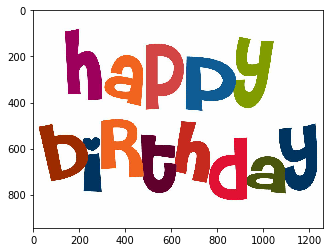

In [3]:
plt.imshow(pil_img)
pil_img.shape

In [4]:
t_img = pil_img.permute(2, 0, 1) 
t_img.shape

torch.Size([3, 945, 1260])

In [5]:
batch = torch.stack([t_img , 0.5*t_img , 0.1*t_img, 0*t_img])
batch.shape

torch.Size([4, 3, 945, 1260])

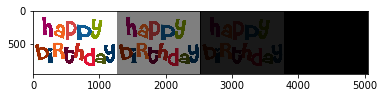

In [6]:
import torchvision
b_img = torchvision.utils.make_grid(batch)
plt.imshow(b_img.permute(1,2,0))

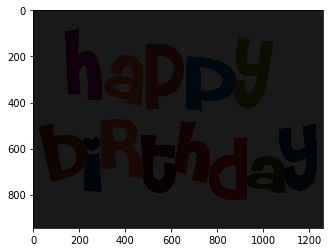

In [7]:
# N=4 x C=3 x h=945 x 1260
t = batch[2]
plt.imshow(t.permute(1, 2, 0))

## Dataloaders

In [8]:
# import torchvision module to handle image manipulation
import torchvision
import torchvision.transforms as transforms

In [9]:
# Use standard FashionMNIST dataset
def gray_to_color(x):
    return x.repeat(3, 1, 1)

#train_set = torchvision.datasets.FashionMNIST(
train_set = torchvision.datasets.MNIST(
    root = '../data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor(),
        gray_to_color,
    ])
)

3


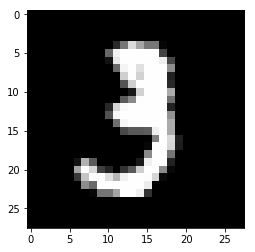

In [10]:
i = 10
img = train_set[i][0]
l = train_set[i][1]

plt.imshow(img.permute(1,2,0))
print(l)

tensor([8, 7, 4, 3, 0, 9, 3, 7])


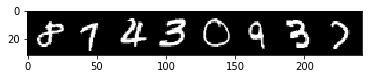

In [11]:
loader = torch.utils.data.DataLoader(train_set, batch_size = 8, num_workers=0, shuffle=True)

img, label = iter(loader).next()
plt.imshow(img[1].permute(1, 2, 0))

imggrid = torchvision.utils.make_grid(img)
plt.imshow(imggrid.permute(1, 2, 0))
print(label)

## Neural networks

In [12]:
# import standard PyTorch modules
import torch
import torch.nn as nn
import torch.optim as optim

network = torchvision.models.resnet18(num_classes=10)

In [13]:
class CNNNetwork(nn.Module):
  def __init__(self, in_channels=3):
    super(CNNNetwork, self).__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
    self.MLP = nn.Linear(in_features=12*4*4, out_features=10)

  def forward(self, batch):
    t = self.conv(batch)
    t = t.reshape(-1, 12*4*4)
    return self.MLP(t)

#network = CNNNetwork(in_channels=3)

In [14]:
losses = []
iterator = iter(loader)
optimizer = optim.SGD(network.parameters(), lr=0.001)
for i in range(200): #range(len(loader)):
    batch = next(iterator)
    preds = network(batch[0])
    loss = nn.functional.cross_entropy(preds, batch[1])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if i%10==0:
        print(i,losses[-1])

0 2.6597182750701904
10 2.6464130878448486
20 2.067478895187378
30 2.4654505252838135
40 2.501187801361084
50 2.3951985836029053
60 2.1340184211730957
70 1.583264946937561
80 1.4596693515777588
90 1.491611123085022
100 1.5271246433258057
110 1.8844345808029175
120 1.4560397863388062
130 1.5284781455993652
140 1.5556031465530396
150 1.5056877136230469
160 1.0502139329910278
170 1.1208086013793945
180 1.483858585357666
190 0.9010328054428101


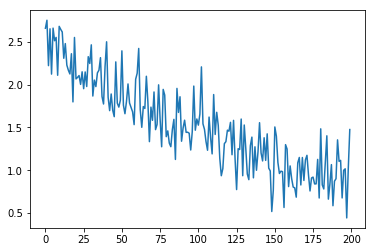

In [15]:
plt.plot(losses);